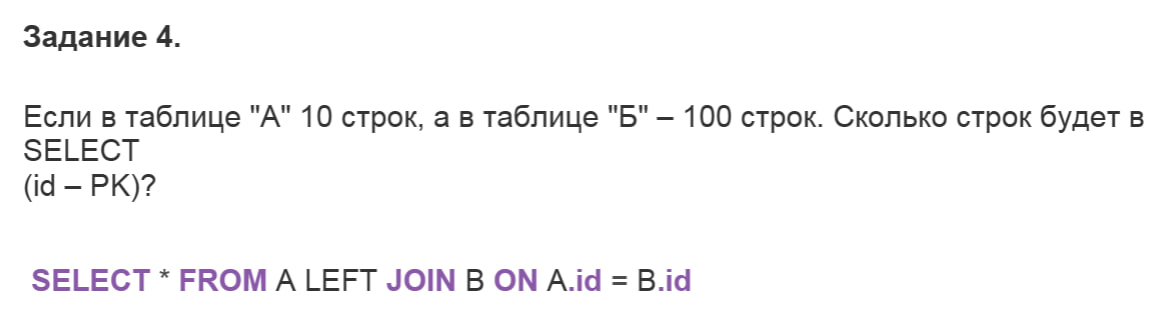

In [1]:
from IPython.display import Image
Image('4.jpg')

Ответ зависит от того, в каких таблицах id является первичным ключом, т.к. первичный ключ - это уникальный объект в таблице.

LEFT JOIN берёт каждую строку из таблицы, которая стоит после ключевого слова "FROM", и ищет по условию связки соотв. ей строку в таблице, которая стоит после слова "JOIN". 
При отсутствии "подходящих строк" в "правой" таблице, строки "левой" таблицы дополняются null и включаются в результат. 
При налачии в правой таблице нескольких подходящих строк, каждая из них попадает в результат.

**id - PK в обеих таблицах**

В этом случае запрос вернёт ровно 10 строк — столько же, сколько в таблице А, т.к. для любой строки из А в таблице В нет нескольких соответствующих строк. При этом даже если совпадений не будет найдено, все строки из таблицы А всё равно попадут в результат.

**id - PK только в А**

В таком случае возможно, что строкам из таблицы А будут соответствовать по несколько строк в таблице В.
Рассмотрим возможные ситуации:
1. Минимум строк в ответе - 10. Это если каждой строке из А соотв. 0 или 1 строка из В;
2. Максимум строк в ответе - 109. Это если одной и той же строке из А соотв. все 100 строк из В + оставшиеся 9 строк из А.
3. Любое число от 10 до 109 в остальных комбинациях.

**id - PK только в В**

В этом случае в результате будет тоже ровно 10 строк, т.к. соответствия строкам из А ищутся однозначно.

Последний случай на всякий случай (каламбур :) захотелось проверить:

In [ ]:
create table BB (
    id integer primary key AUTOINCREMENT,
    name TEXT
);

with recursive fill_rows(n) AS (
    select 1
    union all
    select n + 1 from fill_rows where n < 100
)
insert into BB (name)
select 'Item ' || n from fill_rows;

create table AA (
    id integer,
    name TEXT
);


insert into AA (Id, Name)
values 
    (1, 'Alex'),
    (2, 'Bob'),
    (2, 'Alex'),
    (4, 'Bob'),
    (4, 'Ola'),
    (4, 'Vika'),
    (5, 'Alex'),
    (6, 'Timur'),
    (6, 'Mikael'),
    (7, 'Kate');
    

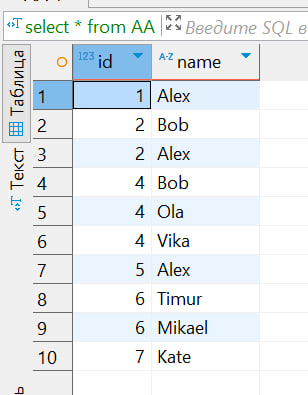

In [7]:
Image('41.jpg')

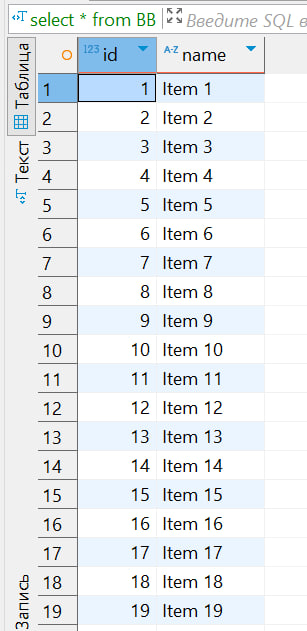

In [8]:
Image('42.jpg')

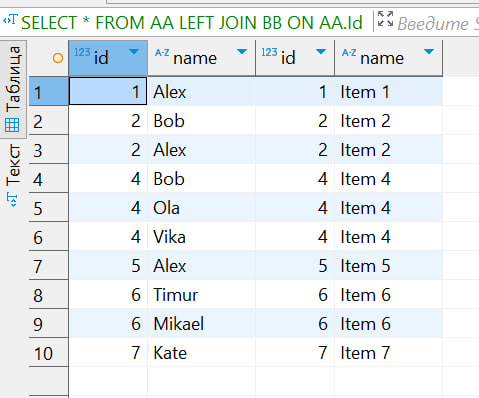

In [9]:
Image('43.jpg')

Да, всё верно.